In [2]:
import os
import pandas as pd

data_path = '/Users/aymenqabel/Downloads/random_split' #Make sure to modify to your location
print('Available data', os.listdir(data_path))

def read_data(partition):
  data = []
  for fn in os.listdir(os.path.join(data_path, partition)):
    with open(os.path.join(data_path, partition, fn)) as f:
      data.append(pd.read_csv(f, index_col=None))
  return pd.concat(data)

# reading all data_partitions and visualizing (head) of the data
df_train = read_data('train')
df_val = read_data('dev')
df_test = read_data('test')
df_train.head()

Available data ['random_split', '.DS_Store', 'test', 'train', 'dev']


,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,Penicillinase_R,Q81U16_BACAN/8-123,PF03965.16,ISEAELEIMKVLWLKSP.QTANEIIEE.LEDP.MDW..KPKTIRTL...,ISEAELEIMKVLWLKSPQTANEIIEELEDPMDWKPKTIRTLINRLV...
1,Rtt106,POB3_CANAL/362-454,PF08512.12,AGVPCSVKA...SEGYLFPL......DRCFLF.VTKPTLYIPYSE....,AGVPCSVKASEGYLFPLDRCFLFVTKPTLYIPYSEISSVVMSRTGG...
2,F-actin_cap_A,Q8I3I2_PLAF7/12-301,PF01267.17,IRHVLMNSPPGKLYDLVK..DINILL.G.........SSVSIQ.KI...,IRHVLMNSPPGKLYDLVKDINILLGSSVSIQKILEEVLKDYNEKNY...
3,HupF_HypC,O28902_ARCFU/1-65,PF01455.18,MCIAIPGR...I.ER..IDY...............P....IAIVDF...,MCIAIPGRIERIDYPIAIVDFKGLKKEVRIDLLENPQIGDYVLVHV...
4,DUF3794,R6BY75_9CLOT/189-271,PF12673.7,NIFHI..LWEDVDL..E.GVTFKPMG...E...........S.......,NIFHILWEDVDLEGVTFKPMGESISVQGDIHIFVLYEGEGENTPIR...


In [2]:
from time import time
t0 = time()
data = {}
data['train'] = read_data('train')
data['val'] = read_data('dev')
data['test'] = read_data('test')
print(time()-t0)    

8.810236930847168


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_reduced['train']['label'] = le.fit_transform(data_reduced['train']['family_accession'])
data_reduced['val']['label'] = le.transform(data_reduced['val']['family_accession'])
data_reduced['test']['label'] = le.transform(data_reduced['test']['family_accession'])

/var/folders/bs/zlf60pzj39j6m3512c_cv5hr0000gn/T/ipykernel_9429/4013846291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['train']['label'] = le.fit_transform(data_reduced['train']['family_accession'])
/var/folders/bs/zlf60pzj39j6m3512c_cv5hr0000gn/T/ipykernel_9429/4013846291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['val']['label'] = le.transform(data_reduced['val']['family_accession'])
/var/folders/bs/zlf60pzj39j6m3512c_cv5hr0000gn/T/ipykernel_9429/4013846291.py:7:

In [26]:
data_reduced['train'].to_csv('data/train.csv')
data_reduced['val'].to_csv('data/val.csv')
data_reduced['test'].to_csv('data/test.csv')

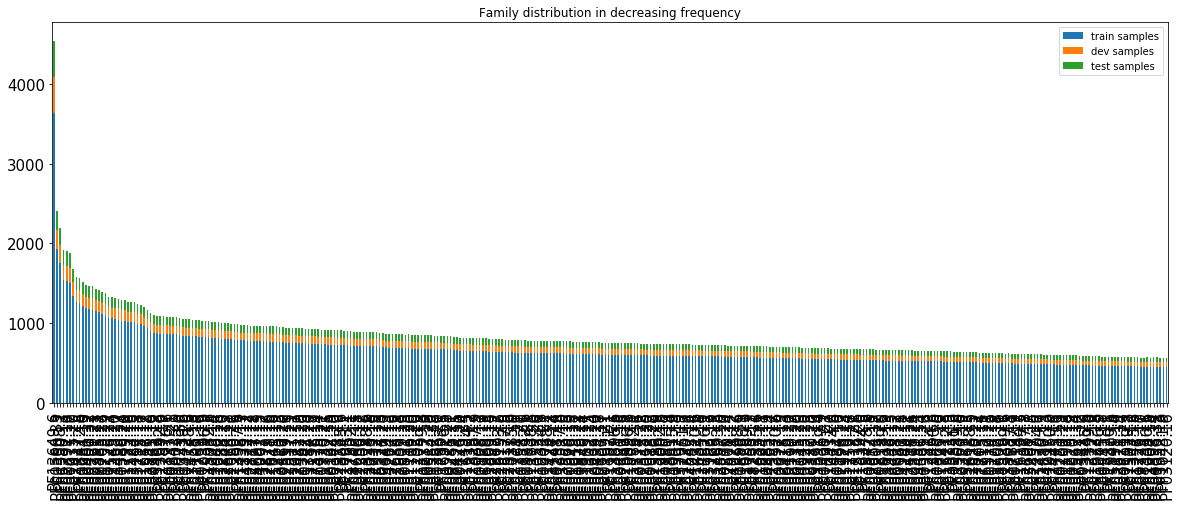

In [3]:
N = 350 # Number of classes to plot
valCounts = pd.concat([pd.DataFrame(data['train'].family_accession.value_counts()[:N]), 
           pd.DataFrame(data['val'].family_accession.value_counts()[:N]), 
           pd.DataFrame(data['test'].family_accession.value_counts()[:N])], 
          axis=1).dropna()
valCounts.columns = ['train samples', 'dev samples', 'test samples']
valCounts.plot.bar(figsize = (20,7), fontsize = 15, stacked=True, title="Family distribution in decreasing frequency")


In [3]:
df_train = pd.read_csv('data/train.csv')

In [4]:
df_train

,Unnamed: 0,family_id,sequence_name,family_accession,aligned_sequence,sequence,label
0,8,Trigger_N,F2I568_AERUA/1-145,PF05697.13,MSVKFEETAT...N.EGVLHFTVSKEDAQKA....LKQAYNRVKG....,MSVKFEETATNEGVLHFTVSKEDAQKALKQAYNRVKGKVNIPGFRK...,79
1,16,SecA_SW,E0TG52_PARBH/637-848,PF07516.13,.IEHPWFTKAVENAQKKIEQRNFDMRKNVLKYDDVMN...DQRRAI...,IEHPWFTKAVENAQKKIEQRNFDMRKNVLKYDDVMNDQRRAIFEQR...,82
2,43,PCRF,D5ANC6_RHOCB/10-198,PF03462.18,ITARFEFLEAKL....NTAL......P.PAEIATL...SREY..SD...,ITARFEFLEAKLNTALPPAEIATLSREYSDLRPVVTEIAAYRQSLD...,72
3,61,Ribosomal_S6,R7BGK4_9FIRM/3-92,PF01250.17,KYELTV...V...I...S...A.K..LEDE..ARL......A.......,KYELTVVISAKLEDEARLATLEKVKDMIARFGGTVTNVNDWGKKKL...,23
4,68,IPPT,MIAA_ONYPE/37-265,PF01715.17,QMYQKYDIGTAKITL......EEA.....QGI.........K.......,QMYQKYDIGTAKITLEEAQGIKHHLLDFLAPGTNYSIYHFQKDARK...,37
...,...,...,...,...,...,...,...
92978,13278,His_kinase,D2PX86_KRIFD/171-249,PF06580.13,AE.L..RALRAQISPHFIYNALAAI......A....SF...V.......,AELRALRAQISPHFIYNALAAIASFVRTDPERARELLLEFADFSRY...,80
92979,13287,Glycos_trans_3N,D7BI04_MEISD/4-63,PF02885.17,...LKKALHA.....E.PLTQDEAHRLMSRI..MS.GD...........,LKKALHAEPLTQDEAHRLMSRIMSGDLTPAQTAGVLIALRTRGETL...,68
92980,13304,MutS_III,MSH3_MOUSE/498-793,PF05192.18,TTLRNLEM.VQ................NQTDM.................,TTLRNLEMVQNQTDMKTKGSLLWVLDHTKTSFGRRKLKNWVTQPLL...,78
92981,13349,Glycos_trans_3N,G0A160_METMM/11-75,PF02885.17,AEFIKILGKGKK.GSR.PLTQDEAYRAMKMI..LA.GE...........,AEFIKILGKGKKGSRPLTQDEAYRAMKMILAGEVQPIQLGAFLMLM...,68


In [5]:
train_dict = df_train[['sequence_name', 'family_accession']].set_index('sequence_name').to_dict()

In [8]:
train_dict

{'family_accession': {'F2I568_AERUA/1-145': 'PF05697.13',
  'E0TG52_PARBH/637-848': 'PF07516.13',
  'D5ANC6_RHOCB/10-198': 'PF03462.18',
  'R7BGK4_9FIRM/3-92': 'PF01250.17',
  'MIAA_ONYPE/37-265': 'PF01715.17',
  'Q9F2K8_STRCO/4-63': 'PF00126.27',
  'R6XPX4_9FIRM/451-541': 'PF02559.16',
  'F2LWN5_HIPMA/19-96': 'PF01817.21',
  'Q2S1D8_SALRD/44-141': 'PF13649.6',
  'G2IJ98_9SPHN/4-164': 'PF03453.17',
  'R6I3V0_9PROT/2-178': 'PF02417.15',
  'R6A065_9FIRM/207-317': 'PF00472.20',
  'Q83G90_TROWT/4-333': 'PF00231.19',
  'Q2K7G0_RHIEC/4-59': 'PF00126.27',
  'E5S7X2_TRISP/6-83': 'PF02881.19',
  'R5JE28_9FIRM/568-777': 'PF07516.13',
  'E7KFJ9_YEASA/465-501': 'PF00400.32',
  'D9R6X3_CLOSW/228-282': 'PF10035.9',
  'H1Z7W7_MYROD/61-144': 'PF13508.7',
  'W0F5E6_9BACT/63-147': 'PF03948.14',
  'RBFA_STRCO/6-110': 'PF02033.18',
  'H8KZ68_FRAAD/41-332': 'PF01523.16',
  'K9S9P6_9CYAN/6-186': 'PF01339.17',
  'C7MB95_BRAFD/272-391': 'PF13288.6',
  'F8L8E6_SIMNZ/9-84': 'PF01817.21',
  'A0LG60_SYNFM/18-107'

In [4]:
classes = list(valCounts[:100].index)
data_reduced = {}
data_reduced['train'] = data['train'][data['train'].family_accession.isin(classes)]
data_reduced['val'] = data['val'][data['val'].family_accession.isin(classes)]
data_reduced['test'] = data['test'][data['test'].family_accession.isin(classes)]

In [22]:
# Inspecting how is it split between train, test, and dev
print('Dataset partition "%s" has %d sequences' % ('train', len(df_train)))
print('Dataset partition "%s" has %d sequences' % ('test', len(df_test)))
print('Dataset partition "%s" has %d sequences' % ('dev', len(df_val)))

Dataset partition "train" has 1086741 sequences
Dataset partition "test" has 126171 sequences
Dataset partition "dev" has 126171 sequences


In [23]:
#Inspecting our labels
import matplotlib.pyplot as plt
import numpy as np

print('Number of unique classes in Train: ', len(np.unique(df_train['family_accession'].values)))
print('Number of unique classes in Val: ', len(np.unique(df_val['family_accession'].values)))
print('Number of unique classes in Test: ', len(np.unique(df_test['family_accession'].values)))

Number of unique classes in Train:  17929
Number of unique classes in Val:  13071
Number of unique classes in Test:  13071


In [28]:
df_test[['sequence_name', 'family_accession']].set_index('sequence_name').to_dict()

{'family_accession': {'I0JRU7_HALH3/259-410': 'PF01447.18',
  'M4V8X0_9PROT/126-339': 'PF01556.18',
  'Q55475_SYNY3/177-241': 'PF00512.25',
  'B3L3Z4_PLAKH/25-170': 'PF06703.11',
  'F7IVL3_TREDE/18-73': 'PF12911.7',
  'B4HK75_DROSE/42-224': 'PF15883.5',
  'K9VGC5_9CYAN/34-159': 'PF07176.11',
  'F6IBT4_9SPHN/56-146': 'PF12599.8',
  'R7KCV1_9CLOT/520-587': 'PF17802.1',
  'B0X5R4_CULQU/21-138': 'PF10396.9',
  'Q9XA23_STRCO/106-497': 'PF10009.9',
  'F4EYD0_SELS3/153-210': 'PF10414.9',
  'R7C1H3_9BURK/128-183': 'PF09285.11',
  'G0NCE0_CAEBE/261-292': 'PF03057.14',
  'G0LAE3_ZOBGA/6-195': 'PF01975.17',
  'F7G830_ORNAN/363-505': 'PF01067.22',
  'H6MZH3_GORPV/43-278': 'PF13472.6',
  'Q21796_CAEEL/155-421': 'PF02485.21',
  'A0RY67_CENSY/138-269': 'PF00329.19',
  'Q9D5W6_MOUSE/481-527': 'PF07648.15',
  'S2K6S2_MUCC1/58-160': 'PF00447.17',
  'H9GTF9_ANOCA/121-228': 'PF00784.17',
  'BRCA1_HUMAN/1642-1723': 'PF00533.26',
  'B9RXD1_RICCO/40-245': 'PF04720.12',
  'D2HYC5_AILME/34-153': 'PF00074.20',


In [4]:
df_train.family_accession.value_counts()

PF13649.6     3637
PF00560.33    1927
PF13508.7     1761
PF06580.13    1537
PF02397.16    1528
              ... 
PF09196.10       1
PF05801.11       1
PF16440.5        1
PF17216.3        1
PF11050.8        1
Name: family_accession, Length: 17929, dtype: int64

In [5]:
df_val.family_accession.value_counts()

PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
             ... 
PF09421.10      1
PF06573.11      1
PF09519.10      1
PF16621.5       1
PF15254.6       1
Name: family_accession, Length: 13071, dtype: int64

In [6]:
df_test.family_accession.value_counts()

PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
             ... 
PF07756.12      1
PF11372.8       1
PF09421.10      1
PF01743.20      1
PF04989.12      1
Name: family_accession, Length: 13071, dtype: int64

In [6]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

record = SeqRecord(seq = 'ATGGEJEHDTE', id = 'sdfsd', name = 'dfdfd', description='sdfds')

In [1]:
data_reduced['test']

NameError: name 'data_reduced' is not defined

In [29]:
from tqdm import tqdm
records = []
for i in tqdm(range(len(df_test))):
    row = df_test.iloc[i]
    records.append(SeqRecord(seq = Seq(row['sequence']), id = row['sequence_name'], name = row['family_id'], description=row['family_accession']))

100%|██████████| 126171/126171 [00:06<00:00, 18224.94it/s]


In [31]:
from Bio import SeqIO
from tqdm import tqdm
records = []
for i in tqdm(range(len(data_reduced['test']))):
    row = data_reduced['test'].iloc[i]
    
    records.append(SeqRecord(seq = Seq(row['sequence']), id = row['sequence_name'], name = row['family_id'], description=row['family_accession']))
with open('test_file.fasta', "w") as output:
    SeqIO.write(records, output, "fasta")

100%|██████████| 11565/11565 [00:01<00:00, 7628.33it/s]


In [32]:
from Bio import SeqIO
from tqdm import tqdm
records = []
for i in tqdm(range(len(data_reduced['val']))):
    row = data_reduced['val'].iloc[i]
    
    records.append(SeqRecord(seq = Seq(row['sequence']), id = row['sequence_name'], name = row['family_id'], description=row['family_accession']))
with open('val_file.fasta', "w") as output:
    SeqIO.write(records, output, "fasta")

100%|██████████| 11565/11565 [00:01<00:00, 11416.40it/s]


In [33]:
from Bio import SeqIO
from tqdm import tqdm
records = []
for i in tqdm(range(len(data_reduced['train']))):
    row = data_reduced['train'].iloc[i]
    
    records.append(SeqRecord(seq = Seq(row['sequence']), id = row['sequence_name'], name = row['family_id'], description=row['family_accession']))
with open('train_file.fasta', "w") as output:
    SeqIO.write(records, output, "fasta")

100%|██████████| 92983/92983 [00:08<00:00, 10747.83it/s]


In [10]:
import pandas as pd
import argparse 
from Bio.Blast.Applications import NcbiblastpCommandline
import logging

def run_BLAST(path_models, subject,file_test, test='test', evalue = 1e-3):
    fwd_out = path_models + f"{test}_{evalue}" # chnage with os path join
    blastp_path = '/usr/local/ncbi/blast/bin/blastp'
    blastp = NcbiblastpCommandline(cmd = blastp_path,
                                   query= file_test, 
                                   subject=subject,
                                   out=fwd_out,
                                    outfmt="6 qseqid sseqid pident qcovs qlen slen length bitscore evalue",
                                    max_target_seqs=1, evalue = evalue,
                                    num_threads = 6)
    _, _ = blastp()
    return fwd_out

def read_results_from_dataframe(fwd_out):
    fwd_results = pd.read_csv(fwd_out, sep="\t", header=None)
    headers = ["query", "subject", "identity", "coverage",
            "qlength", "slength", "alength",
            "bitscore", "E-value"]
    fwd_results.columns = headers
    fwd_results['norm_bitscore'] = fwd_results.bitscore/fwd_results.qlength
    return fwd_results

def get_results(fwd_results, train_dict, test_dict, names_test):
    predictions = dict.fromkeys(dict(test_dict), 'N')
    for row in fwd_results.values:
        predictions[row[0]] = train_dict[row[1]]
    y_true = []
    y_pred = []
    names = []
    for prot in test_dict.keys():
        y_true.append(test_dict[prot])
        y_pred.append(predictions[prot])
        names.append(names_test[prot])
    return y_true, y_pred, names

In [16]:
!blastp

zsh:1: command not found: blastp


In [35]:
subject = f"train_file.fasta"
query =f"test_file.fasta"   
fwd_out = run_BLAST('', subject, query, f"test", evalue=1e-3)
fwd_results = read_results_from_dataframe(fwd_out)

KeyboardInterrupt: 

In [11]:
fwd_results = read_results_from_dataframe('models/test_0.001')

In [12]:
fwd_results[['query', 'identity']]

,query,identity
0,M4V8X0_9PROT/126-339,60.748
1,R7KCV1_9CLOT/520-587,46.154
2,B0X5R4_CULQU/21-138,70.339
3,H6MZH3_GORPV/43-278,41.597
4,Q7UKR5_RHOBA/213-439,77.974
...,...,...
11258,C6WZR6_FLAB3/4-120,76.068
11259,E3D141_9BACT/5-170,69.697
11260,R6NI69_9CLOT/228-338,79.279
11261,F3YVU9_DESAF/31-551,75.240


In [14]:
df = pd.read_csv('data/test.csv')

In [15]:
identities = {}
for query in df.sequence_name:
    identities[query] = -1

In [20]:
for i in range(len(fwd_results)):
    row = fwd_results[['query', 'identity']].iloc[i]
    identities[row['query']] = row['identity']

In [30]:
identities['I0JRU7_HALH3/259-410']

42.697

In [21]:
len(identities)

11565

In [17]:
import json
def save_to_json(results, path_results,):
    file_path = os.path.join(path_results, f"identities.json")
    with open(file_path, 'w') as f:
        json.dump(results, f)

In [22]:
save_to_json(identities,'data')

In [23]:
identities

{'M4V8X0_9PROT/126-339': 60.748,
 'R7KCV1_9CLOT/520-587': 46.154,
 'B0X5R4_CULQU/21-138': 70.339,
 'H6MZH3_GORPV/43-278': 41.597,
 'Q7UKR5_RHOBA/213-439': 77.974,
 'S3CNX4_OPHP1/11-126': 75.862,
 'C7RTY6_ACCPU/272-390': 65.254,
 'D4MTH9_9FIRM/236-290': 76.364,
 'Q982Y8_RHILO/15-191': 59.322,
 'F0SWT2_SYNGF/411-477': 58.209,
 'G4L597_TETHN/7-186': 70.556,
 'G7M302_9CLOT/29-324': 44.667,
 'R7B293_9BACE/507-602': 76.042,
 'I2EYR1_EMTOG/616-813': 72.727,
 'A0LIP7_SYNFM/171-267': 48.889,
 'C7N0P6_SLAHD/38-152': 73.913,
 'R5T422_9CLOT/398-610': 62.911,
 'J7ISE4_DESMD/359-437': 58.228,
 'Q2RUR0_RHORT/3-140': 63.768,
 'R5EZN7_9CLOT/386-465': 61.25,
 'A9QPI2_METI4/6-121': 48.276,
 'I0GT11_SELRL/427-522': 57.292,
 'I4CDD1_DESTA/481-533': 54.902,
 'R7CJM9_9FIRM/2-83': 79.268,
 'A0A0J6NLX3_9NEIS/139-270': 37.209,
 'L0EE21_THECK/7-81': 75.676,
 'A0L561_MAGMM/274-459': 66.845,
 'G3Q5P6_GASAC/565-634': 78.571,
 'Q11KE9_CHESB/143-286': 60.417,
 'G0G2L9_AMYMS/235-338': 42.697,
 'B4EM39_BURCJ/43-136': 5